In [134]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)


In [215]:
# Grab and process the raw data.
crimestats_baseline = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')
crimestats = crimestats_baseline

In [216]:

crimestats.head(300)


,City,Population,Violent_Crime,Murder_and_Nonnegligent_Manslaughter,Rape_Revised,Rape_Legacy,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0


In [206]:
# dropping the Rape 1 column due to it not having any contents
crimestats.drop('Rape_Revised', axis=1, inplace=True)

# dropping the Arson column due to it having so many NaN values
crimestats.drop('Arson', axis=1, inplace=True)


In [207]:
# adding in features requested in the drill

def yesno(x):
    if x > 0:
        return 1
    else:
        return 0

crimestats['murder_yesno'] = crimestats.apply(lambda row: yesno(row['Murder_and_Nonnegligent_Manslaughter']), axis=1)

crimestats['robbery_yesno'] = crimestats.apply(lambda row: yesno(row['Robbery']), axis=1)


In [208]:
# creating features using the ratio of crime to population

def popratio(x,y):
    return (1000*(x/y))

crimestats['violent_crime_per1000'] = 1000 * crimestats['Violent_Crime'] / crimestats['Population']

crimestats['murder_per1000'] = 1000 * crimestats['Murder_and_Nonnegligent_Manslaughter'] / crimestats['Population']

crimestats['rape_per1000'] = 1000 * crimestats['Rape_Legacy'] / crimestats['Population']

crimestats['robbery_per1000'] = 1000 * crimestats['Robbery'] / crimestats['Population']

crimestats['assault_per1000'] = 1000 * crimestats['Aggravated_Assault'] / crimestats['Population']

crimestats['propertycrime_per1000'] = 1000 * crimestats['Property_Crime'] / crimestats['Population']

crimestats['burglary_per1000'] = 1000 * crimestats['Burglary'] / crimestats['Population']

crimestats['larceny_per1000'] = 1000 * crimestats['Larceny_Theft'] / crimestats['Population']

crimestats['motorvehicle_crime_per1000'] = 1000 * crimestats['Motor_Vehicle_Theft'] / crimestats['Population']


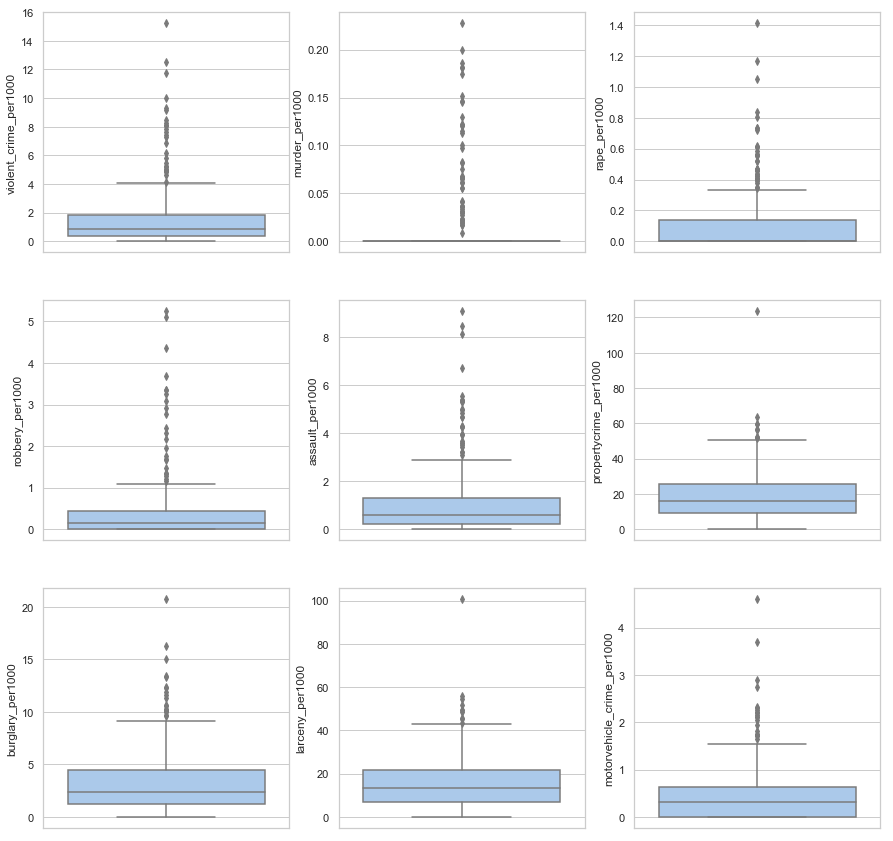

In [195]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
sns.boxplot(y = 'violent_crime_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 2)
sns.boxplot(y = 'murder_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 3)
sns.boxplot(y = 'rape_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 4)
sns.boxplot(y = 'robbery_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 5)
sns.boxplot(y = 'assault_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 6)
sns.boxplot(y = 'propertycrime_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 7)
sns.boxplot(y = 'burglary_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 8)
sns.boxplot(y = 'larceny_per1000', data=crimestats, palette='pastel')  
plt.subplot(3, 3, 9)
sns.boxplot(y = 'motorvehicle_crime_per1000', data=crimestats, palette='pastel')  
plt.show()



In [ ]:
# testing ground for ways to turn NaN's in Arson into 0's

def arson_fix(x):
    return (x+1)

crimestats['Arson'] = crimestats.apply(lambda row: arson_fix(row['Arson']), axis=1)


In [212]:
print(crimestats.loc[crimestats['violent_crime_per1000'] > 10, ['City', 'violent_crime_per1000']])
print(' ')
print(crimestats.loc[crimestats['murder_per1000'] > .16, ['City', 'murder_per1000']])
print(' ')
print(crimestats.loc[crimestats['rape_per1000'] > 1, ['City', 'rape_per1000']])
print(' ')
print(crimestats.loc[crimestats['robbery_per1000'] > 4, ['City', 'robbery_per1000']])
print(' ')
print(crimestats.loc[crimestats['assault_per1000'] > 6, ['City', 'assault_per1000']])
print(' ')
print(crimestats.loc[crimestats['propertycrime_per1000'] > 60, ['City', 'propertycrime_per1000']])
print(' ')
print(crimestats.loc[crimestats['burglary_per1000'] > 15, ['City', 'burglary_per1000']])
print(' ')
print(crimestats.loc[crimestats['larceny_per1000'] > 55, ['City', 'larceny_per1000']])
print(' ')
print(crimestats.loc[crimestats['motorvehicle_crime_per1000'] > 3, ['City', 'motorvehicle_crime_per1000']])


              City  violent_crime_per1000
35         Buffalo              12.554629
209       Newburgh              15.225228
218  Niagara Falls              11.780369
272      Rochester              10.006554
 
                     City  murder_per1000
35                Buffalo        0.181615
140     Hempstead Village        0.181166
209              Newburgh        0.175003
262          Poughkeepsie        0.227435
272             Rochester        0.199466
281  Saranac Lake Village        0.186254
 
                 City  rape_per1000
141  Herkimer Village      1.169895
180     Lyons Village      1.411233
296    Sidney Village      1.051248
 
          City  robbery_per1000
35     Buffalo         5.108409
209   Newburgh         5.250079
272  Rochester         4.359761
 
                  City  assault_per1000
35             Buffalo         6.704304
209           Newburgh         9.065136
218      Niagara Falls         8.129261
344  Woodridge Village         8.443908
 
              

In [213]:
# Remove 289: Seneca Falls Town due to the massive differential in per-1000-people burglary, property crime, 
# and larceny that it has relative to other cities.

crimestats.drop(289, axis=0, inplace=True)
